In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import matplotlib.font_manager as fm

In [44]:
# NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

# 데이터 불러오기

In [7]:
df_21 = pd.read_csv('/content/2021.csv')
df_22 = pd.read_csv('/content/2022.csv')
df_23 = pd.read_csv('/content/2023.csv')

In [ ]:
df23.tail()

,시즌(년도)_x,소속,라운드,상대팀_x,No._x,선수명,포지션,등번호,출전시간(분),득점,...,파울,피파울,경고,퇴장,시즌(년도)_y,상대팀_y,No._y,주발,포지션 상세,정발여부
1075,2023,수원FC,35R,서울(H),5,박철우,DF,3,103,0,...,2,0,0,0,2023,서울(H),5,NaN,LB,정발x
1076,2023,수원FC,36R,수원(H),2,우고고메스,DF,25,101,1,...,2,1,1,0,2023,수원(H),2,right,CB1,정발x
1077,2023,수원FC,36R,수원(H),3,신세계,DF,30,101,0,...,0,0,0,0,2023,수원(H),3,right,CB2,정발
1078,2023,수원FC,36R,수원(H),4,박철우,DF,3,66,0,...,0,1,0,0,2023,수원(H),4,NaN,LB,정발x
1079,2023,수원FC,36R,수원(H),5,오인표,DF,13,101,0,...,0,0,0,0,2023,수원(H),5,NaN,RB,정발x


# 팀 분석용 테이블 제작

In [ ]:
df_21['라운드'].unique()
df_21.head()

,시즌(년도),소속,라운드,상대팀,No.,선수명,주발,포지션 상세,정발여부
0,2021.0,울산,1R,강원(H),2.0,설영우,right,LB,정발x
1,2021.0,울산,1R,강원(H),3.0,불투이스,left,CB1,정발
2,2021.0,울산,1R,강원(H),4.0,김기희,right,CB2,정발
3,2021.0,울산,1R,강원(H),5.0,김태환,right,RB,정발
4,2021.0,울산,2R,광주(A),2.0,김기희,right,CB2,정발


In [ ]:
df_21['소속'].unique()

array(['울산', '수원', '포항', '전북', '성남', '서울', '인천', '강원', '광주', '수원FC', nan],
      dtype=object)

In [ ]:
# 라운드별로 데이터를 변환하여 새로운 데이터프레임 생성
# data : foot table (df_21, df_22, df_23)

def team(data):
  new_columns = [
    '라운드', '소속', '상대팀',
    'LB 이름', 'LB 선호발', 'LB 정발 여부',
    'RB 이름', 'RB 선호발', 'RB 정발 여부',
    'CB1 이름', 'CB1 선호발', 'CB1 정발 여부',
    'CB2 이름', 'CB2 선호발', 'CB2 정발 여부'
    ]

  transformed_data = []


  for team_info in data['소속'].unique():# 배열 [울산, 서울, 수원...]
    team_df = data[data['소속'] == team_info]
    for round_info in team_df['라운드'].unique(): # 배열 [1R, 2R, 3R...]
        round_df = team_df[team_df['라운드'] == round_info]
        row = {'라운드': round_df['라운드'].values[0], '소속': round_df['소속'].values[0], '상대팀': round_df['상대팀'].values[0]}

        for position in ['LB', 'RB', 'CB1', 'CB2']:
            player_info = round_df[round_df['포지션 상세'] == position]

            if not player_info.empty:
                row[f'{position} 이름'] = player_info['선수명'].values[0]
                row[f'{position} 선호발'] = player_info['주발'].values[0]
                row[f'{position} 정발 여부'] = player_info['정발여부'].values[0]
            else:
                row[f'{position} 이름'] = ''
                row[f'{position} 선호발'] = ''
                row[f'{position} 정발 여부'] = ''

        transformed_data.append(row)

  transformed_df = pd.DataFrame(transformed_data, columns=new_columns)
  return transformed_df

team_df21 = team(df_21)
team_df22 = team(df_22)
team_df23 = team(df_23)

,라운드,소속,상대팀,LB 이름,LB 선호발,LB 정발 여부,RB 이름,RB 선호발,RB 정발 여부,CB1 이름,CB1 선호발,CB1 정발 여부,CB2 이름,CB2 선호발,CB2 정발 여부
0,1R,울산,강원(H),설영우,right,정발x,김태환,right,정발,불투이스,left,정발,김기희,right,정발
1,2R,울산,광주(A),설영우,right,정발x,김태환,right,정발,불투이스,left,정발,김기희,right,정발
2,3R,울산,인천(H),홍철,left,정발,김태환,right,정발,불투이스,left,정발,김기희,right,정발
3,4R,울산,포항(A),홍철,left,정발,김태환,right,정발,불투이스,left,정발,김기희,right,정발
4,5R,울산,제주(H),설영우,right,정발x,김태환,right,정발,불투이스,left,정발,김기희,right,정발
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,9R,수원FC,울산(H),김상원,NaN,정발x,장준영,right,정발x,조유민,right,정발x,박지수,both,정발x
249,10R,수원FC,강원(H),김상원,NaN,정발x,정동호,right,정발,조유민,right,정발x,박지수,both,정발x
250,11R,수원FC,포항(A),김상원,NaN,정발x,정동호,right,정발,조유민,right,정발x,박지수,both,정발x
251,12R,수원FC,서울(H),김상원,NaN,정발x,장준영,right,정발x,조유민,right,정발x,박지수,both,정발x


In [10]:
df21 = pd.read_csv('/content/2021.csv',encoding='utf-8-sig')
df22 = pd.read_csv('/content/2022.csv',encoding='utf-8-sig')
df23 = pd.read_csv('/content/2023.csv',encoding='utf-8-sig')

df = pd.concat([df21, df22, df23], ignore_index=True)
df_3y = df[['선수명', '소속', '라운드','주발', '포지션 상세', '정발여부','득점', '도움', '슈팅', '유효슈팅', '블락된슈팅', '벗어난슈팅', 'PA내슈팅', 'PA외슈팅', '오프사이드', '프리킥', '코너킥', '스로인', '드리블시도', '드리블성공', '드리블성공%', '패스시도', '패스성공', '패스성공%', '키패스', '전방패스시도', '전방패스성공', '전방패스성공%', '후방패스시도', '후방패스성공', '후방패스성공%', '횡패스시도', '횡패스성공', '횡패스성공%', '공격진영패스시도', '공격진영패스성공', '공격진영패스성공%', '수비진영패스시도', '수비진영패스성공', '수비진영패스성공%', '중앙진영패스시도', '중앙진영패스성공', '중앙진영패스성공%', '롱패스시도', '롱패스성공', '롱패스성공%', '중거리패스시도', '중거리패스성공', '중거리패스성공%', '단거리패스시도', '단거리패스성공', '단거리패스성공%', '크로스시도', '크로스성공', '크로스성공%', '탈압박', '지상경합시도', '지상경합성공', '지상경합성공%', '공중경합시도', '공중경합성공', '공중경합성공%', '태클시도', '태클성공', '태클성공%', '클리어링', '인터셉트', '차단', '획득', '블락', '볼미스', '파울' ]]

In [11]:
lb = df_3y[df_3y['포지션 상세']=='LB']
rb = df_3y[df_3y['포지션 상세']=='RB']
side = df_3y[(df_3y['포지션 상세']=='LB') | (df['포지션 상세']=='RB')]

In [ ]:
print(len(lb['선수명'].unique()))
print(len(rb['선수명'].unique()))

76
79


# T 검정

In [28]:
from scipy.stats import ttest_ind

# data : 3개년 사이드백 데이터
# p : p_value 0.05 이하 필터링 여부
# values : 시각화 용 원본 데이터 리스트 추가 여부

def t_test(
      data,
      p=False,
      values=False
    ):
  group_정발 = data[data['정발여부'] == '정발']
  group_정발x = data[data['정발여부'] == '정발x']

  columns_to_compare = ['득점', '도움', '슈팅', '유효슈팅', '블락된슈팅', '벗어난슈팅', 'PA내슈팅', 'PA외슈팅', '드리블시도', '드리블성공', '패스시도', '패스성공',  '키패스', '전방패스시도', '전방패스성공', '후방패스시도', '후방패스성공', '횡패스시도', '횡패스성공', '공격진영패스시도', '공격진영패스성공',  '수비진영패스시도', '수비진영패스성공',  '중앙진영패스시도', '중앙진영패스성공',  '롱패스시도', '롱패스성공',  '중거리패스시도', '중거리패스성공',  '단거리패스시도', '단거리패스성공',  '크로스시도', '크로스성공',  '탈압박', '지상경합시도', '지상경합성공',  '공중경합시도', '공중경합성공', '태클시도', '태클성공', '클리어링', '인터셉트', '차단', '획득', '블락', '볼미스', '파울']

  # t-검정 수행 및 결과 출력
  results = []
  for column in columns_to_compare:
      t_stat, p_value = ttest_ind(group_정발[column], group_정발x[column], nan_policy='omit')
      mean_정발 = group_정발[column].mean().round(3)
      mean_정발x = group_정발x[column].mean().round(3)

      if values:
        results.append({
            '지표명': column,
            '정발 경기별 평균': mean_정발,
            '정발x 경기별 평균': mean_정발x,
            '차이': mean_정발 - mean_정발x,
            't-statistic': t_stat.round(5),
            'p-value': p_value.round(5),
            '정발 데이터': group_정발[column].tolist(),
            '정발x 데이터': group_정발x[column].tolist()
        })
      else:
         results.append({
            '지표명': column,
            '정발 경기별 평균': mean_정발,
            '정발x 경기별 평균': mean_정발x,
            '차이': mean_정발 - mean_정발x,
            't-statistic': t_stat.round(5),
            'p-value': p_value.round(5)

        })
  results_df = pd.DataFrame(results)

  # p-value 0.05 이하만 호출
  if p:
    results_df = results_df[results_df['p-value'] <= 0.05]

  return results_df

rb_test = t_test(rb)
lb_test = t_test(lb)
side_test = t_test(side, p=True)
side_vis = t_test(side, p=True, values=True)

# 사이드백 포지션에서 정발 여부와 플레이 스타일의 차이가 나는 지표들

In [ ]:
side_test.sort_values('p-value')

,지표명,정발 경기별 평균,정발x 경기별 평균,차이,t-statistic,p-value
35,크로스성공,0.777130,0.527491,0.249638,4.767780,0.00000
34,크로스시도,3.655776,2.503436,1.152340,7.226511,0.00000
22,공격진영패스시도,13.330222,10.955326,2.374895,5.489754,0.00000
23,공격진영패스성공,10.675613,8.769759,1.905853,5.183759,0.00000
18,후방패스시도,14.680280,12.931271,1.749009,4.240419,0.00002
19,후방패스성공,14.493582,12.749141,1.744441,4.261045,0.00002
40,공중경합성공,1.340723,1.690722,-0.349998,-4.133620,0.00004
25,수비진영패스성공,8.682614,9.977663,-1.295049,-4.143576,0.00004
43,클리어링,2.674446,3.218213,-0.543767,-3.932472,0.00009
39,공중경합시도,2.544924,3.000000,-0.455076,-3.887744,0.00011


In [31]:
# 정발일 때 플레이 스타일
pre_sup = side_test[side_test['차이'] > 0].sort_values('p-value')

pre_sup

,지표명,정발 경기별 평균,정발x 경기별 평균,차이,t-statistic,p-value
19,공격진영패스시도,13.330,10.955,2.375,5.48975,0.00000
20,공격진영패스성공,10.676,8.770,1.906,5.18376,0.00000
31,크로스시도,3.656,2.503,1.153,7.22651,0.00000
32,크로스성공,0.777,0.527,0.250,4.76778,0.00000
15,후방패스시도,14.680,12.931,1.749,4.24042,0.00002
16,후방패스성공,14.494,12.749,1.745,4.26104,0.00002
12,키패스,0.683,0.526,0.157,3.47131,0.00053
25,롱패스시도,5.824,5.227,0.597,3.17280,0.00154
29,단거리패스시도,30.320,28.325,1.995,2.93637,0.00337
30,단거리패스성공,27.011,25.296,1.715,2.63639,0.00847


In [30]:
# 정발이 아닐 때 플레이 스타일
rev_sup = side_test[side_test['차이'] < 0].sort_values('p-value')

rev_sup

,지표명,정발 경기별 평균,정발x 경기별 평균,차이,t-statistic,p-value
22,수비진영패스성공,8.683,9.978,-1.295,-4.14358,0.00004
37,공중경합성공,1.341,1.691,-0.350,-4.13362,0.00004
40,클리어링,2.674,3.218,-0.544,-3.93247,0.00009
36,공중경합시도,2.545,3.000,-0.455,-3.88774,0.00011
21,수비진영패스시도,11.158,12.423,-1.265,-3.71487,0.00021
6,PA내슈팅,0.146,0.196,-0.050,-2.20440,0.02765
41,인터셉트,2.697,2.912,-0.215,-1.96682,0.04940


# 플레이 양상의 차이가 나는 부분을 시각화

In [32]:
side_vis

,지표명,정발 경기별 평균,정발x 경기별 평균,차이,t-statistic,p-value,정발 데이터,정발x 데이터
6,PA내슈팅,0.146,0.196,-0.050,-2.20440,0.02765,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, ..."
10,패스시도,55.070,52.497,2.573,2.42712,0.01534,"[71, 63, 70, 83, 43, 37, 84, 85, 102, 74, 65, ...","[87, 81, 100, 103, 58, 69, 84, 34, 53, 67, 60,..."
12,키패스,0.683,0.526,0.157,3.47131,0.00053,"[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 4, 0, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, ..."
15,후방패스시도,14.680,12.931,1.749,4.24042,0.00002,"[15, 23, 19, 25, 10, 6, 23, 19, 35, 13, 20, 14...","[30, 19, 37, 27, 23, 25, 22, 6, 13, 25, 19, 23..."
16,후방패스성공,14.494,12.749,1.745,4.26104,0.00002,"[14, 23, 19, 25, 10, 6, 23, 19, 35, 13, 19, 14...","[28, 19, 37, 27, 23, 24, 22, 6, 13, 24, 19, 23..."
19,공격진영패스시도,13.330,10.955,2.375,5.48975,0.00000,"[26, 17, 10, 17, 0, 13, 20, 27, 20, 17, 16, 42...","[10, 9, 8, 17, 23, 19, 38, 4, 4, 25, 8, 24, 5,..."
20,공격진영패스성공,10.676,8.770,1.906,5.18376,0.00000,"[19, 14, 7, 12, 0, 12, 16, 20, 15, 11, 15, 27,...","[9, 8, 6, 16, 20, 12, 26, 2, 2, 15, 8, 17, 5, ..."
21,수비진영패스시도,11.158,12.423,-1.265,-3.71487,0.00021,"[11, 16, 17, 15, 14, 12, 19, 13, 26, 9, 13, 10...","[27, 23, 20, 15, 13, 10, 12, 12, 8, 8, 13, 12,..."
22,수비진영패스성공,8.683,9.978,-1.295,-4.14358,0.00004,"[9, 13, 11, 13, 8, 9, 15, 11, 20, 5, 10, 9, 13...","[20, 17, 17, 12, 9, 8, 8, 7, 7, 7, 10, 8, 9, 1..."
23,중앙진영패스시도,30.582,29.119,1.463,2.01559,0.04403,"[34, 30, 43, 51, 29, 12, 45, 45, 56, 48, 36, 1...","[50, 49, 72, 71, 22, 40, 34, 18, 41, 34, 39, 2..."


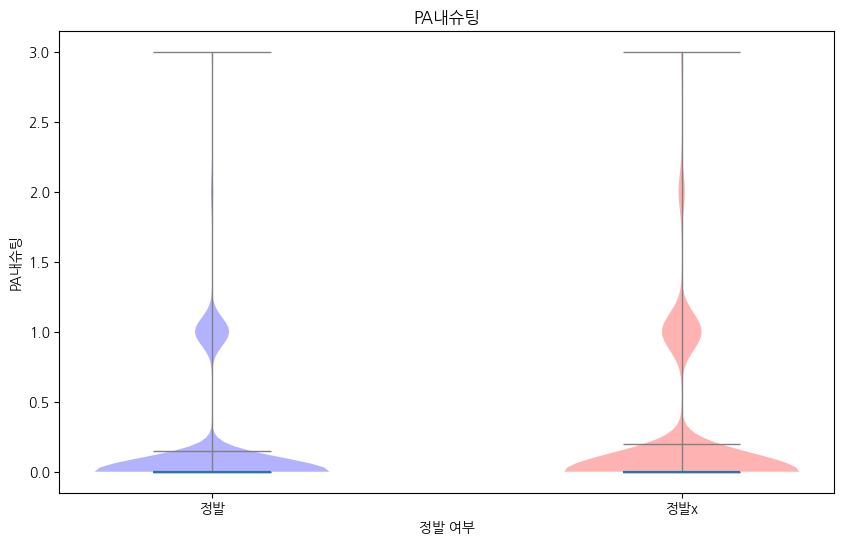

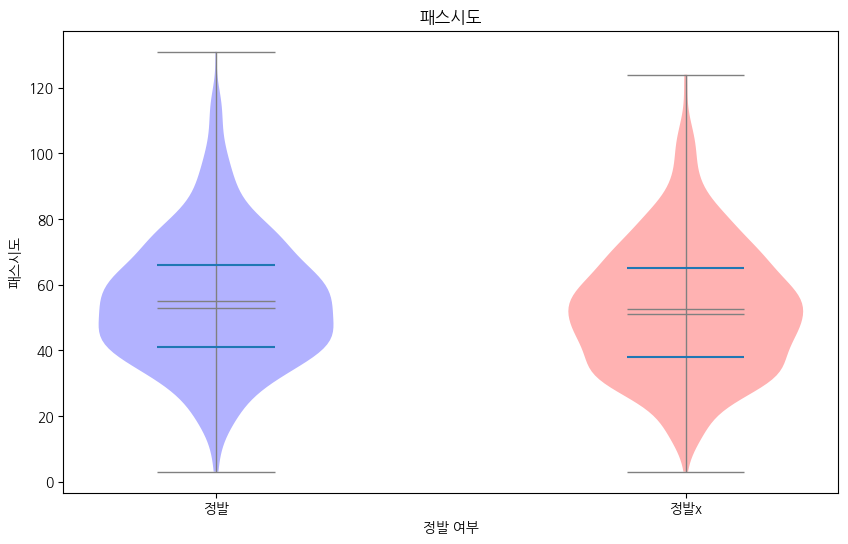

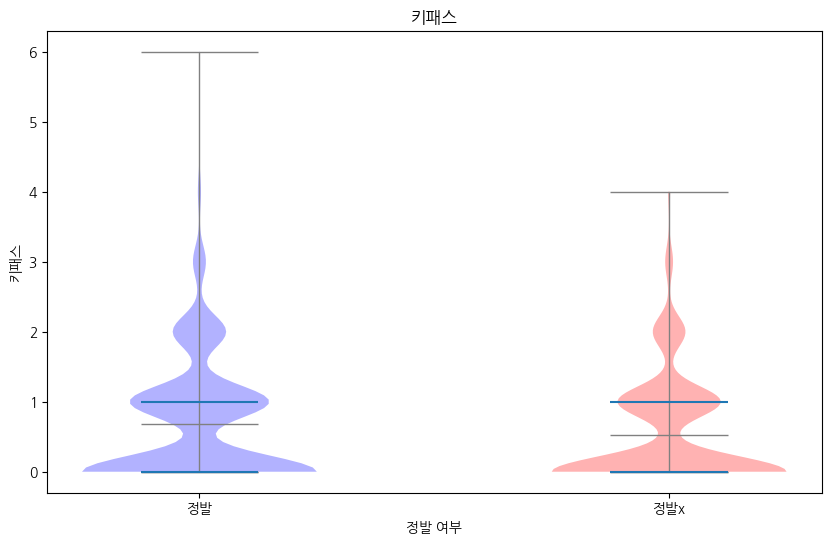

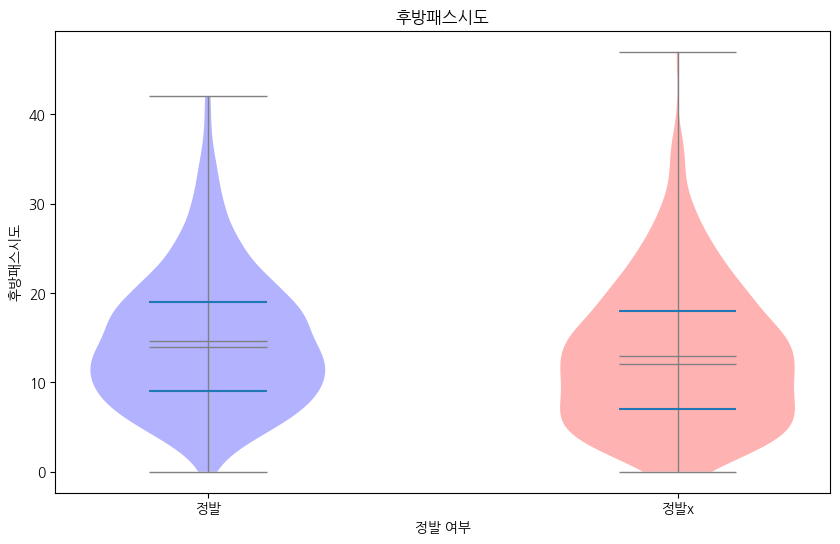

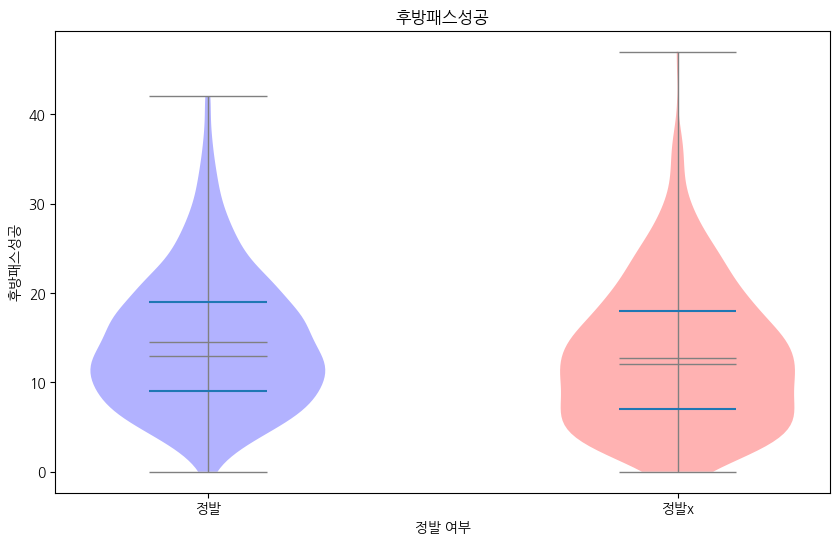

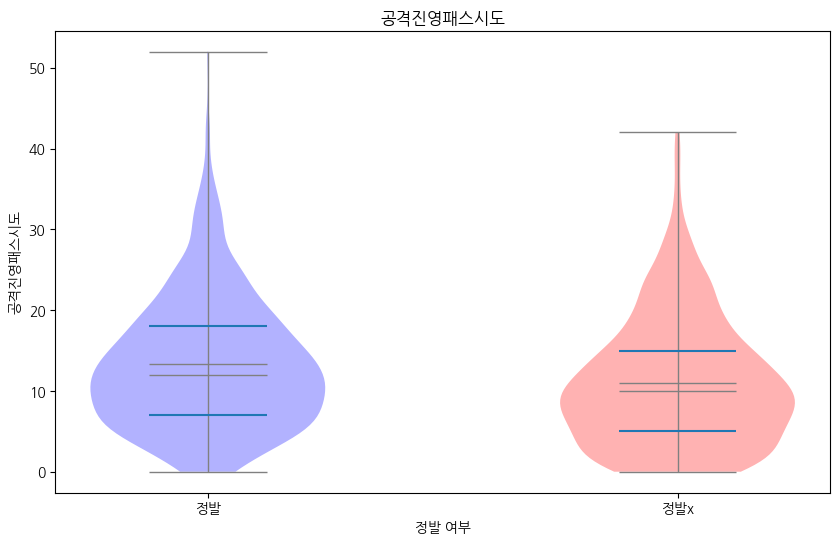

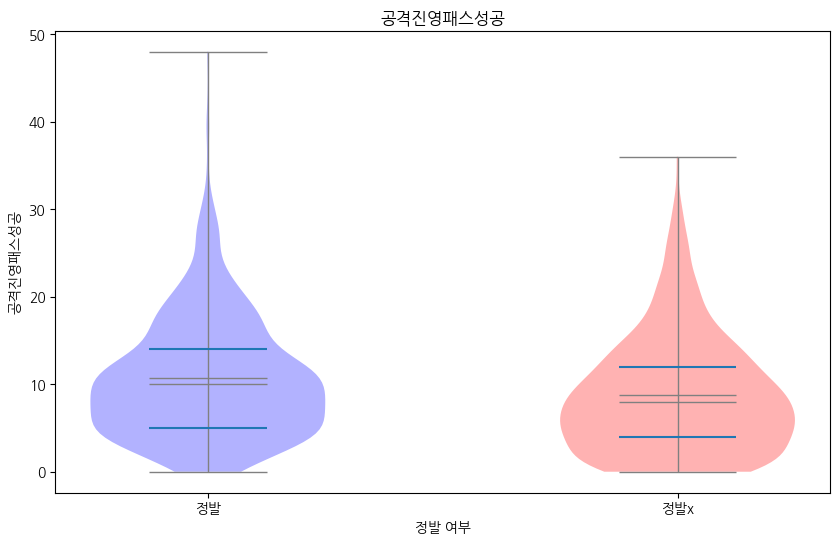

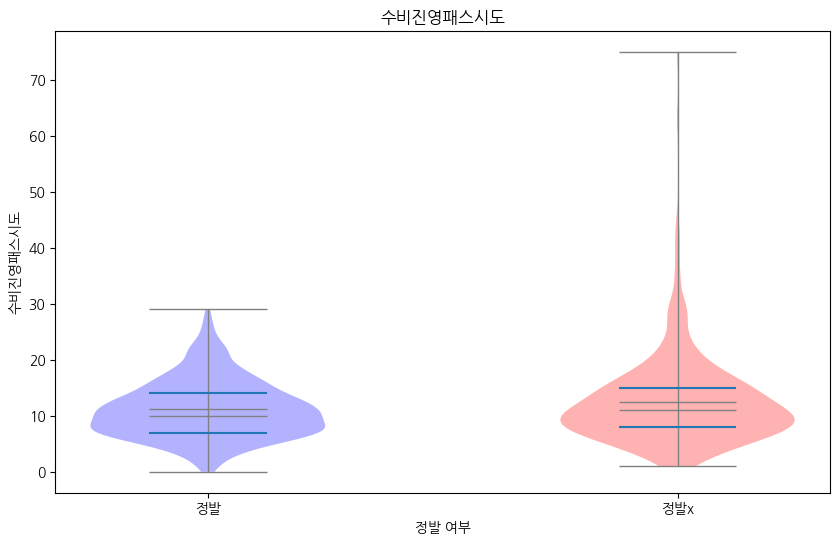

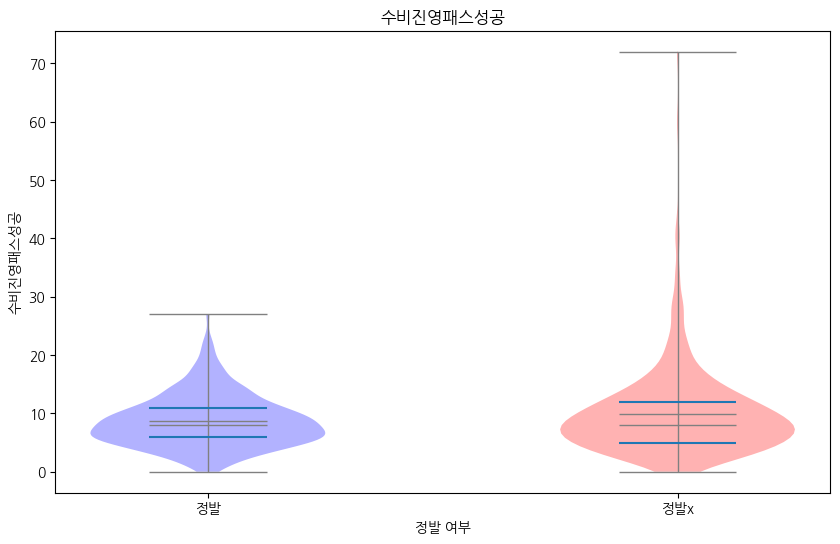

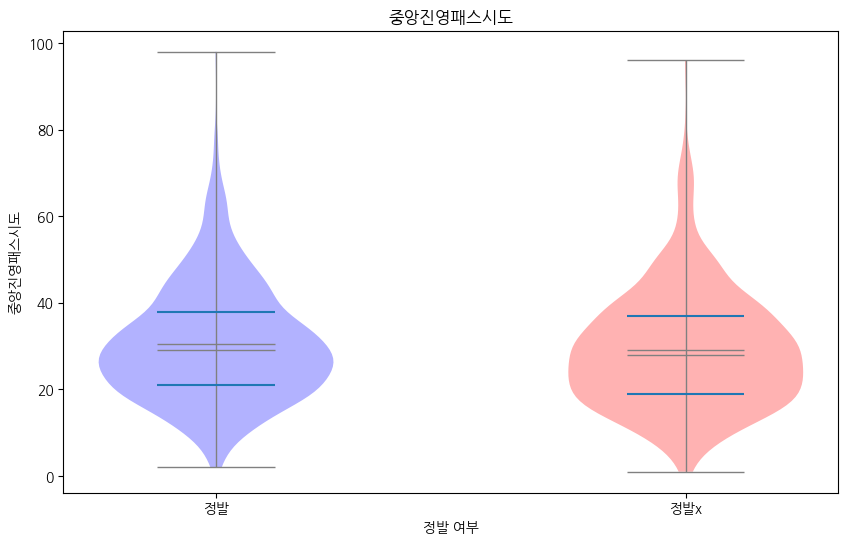

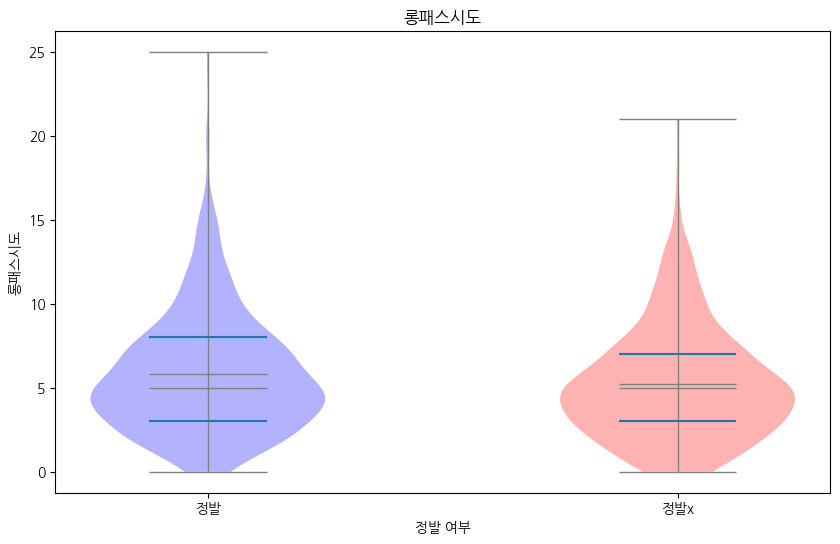

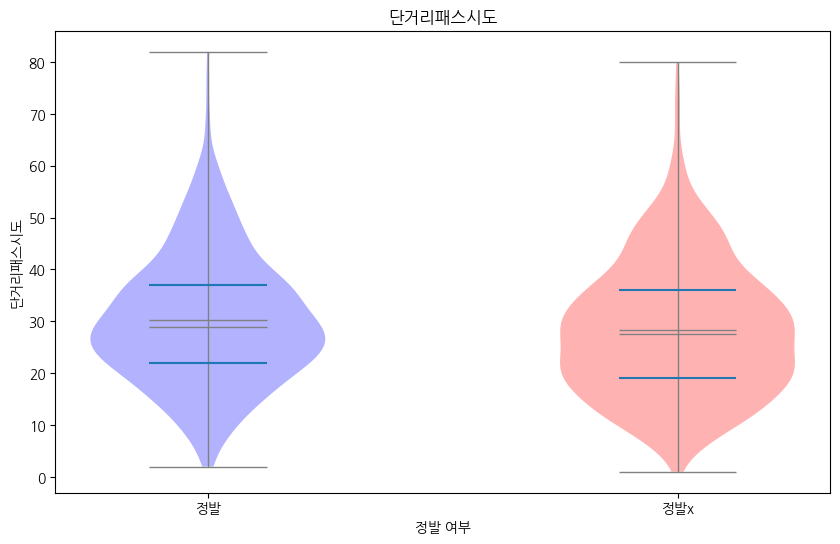

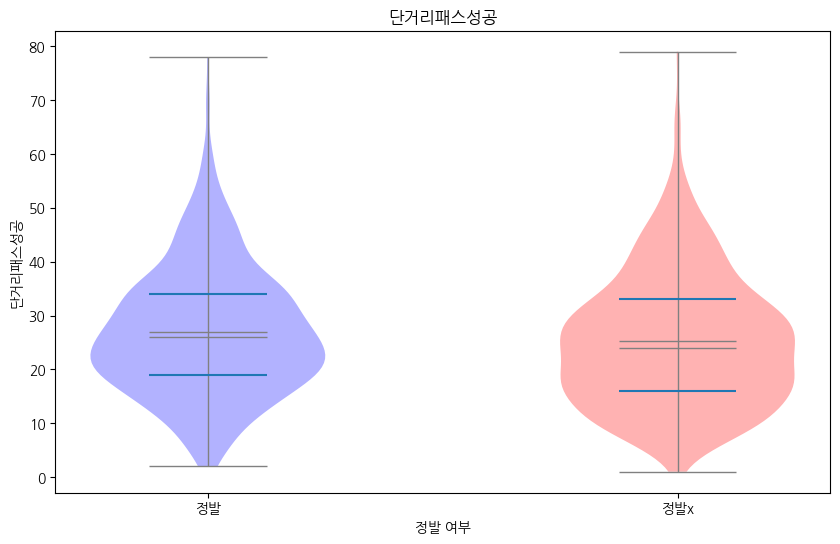

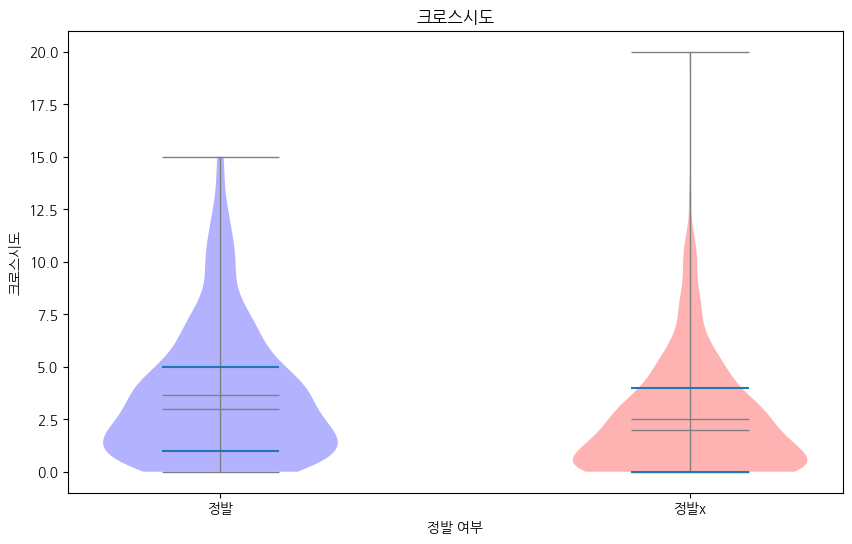

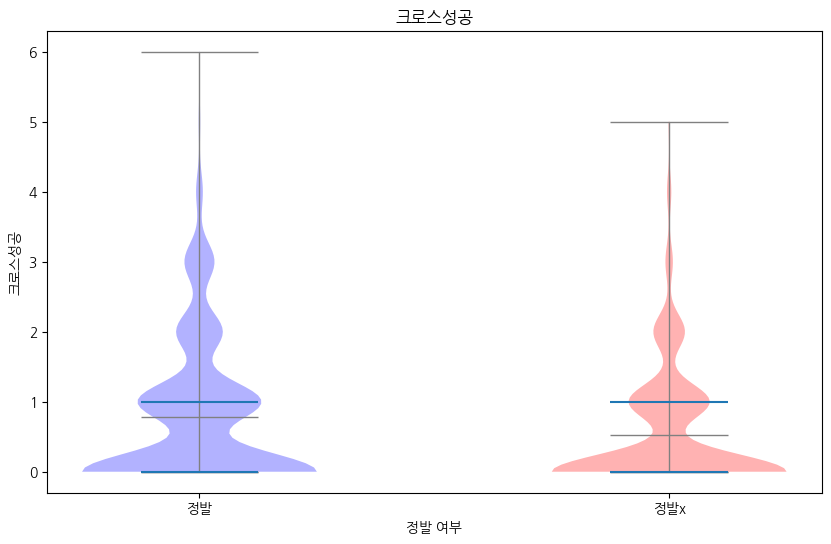

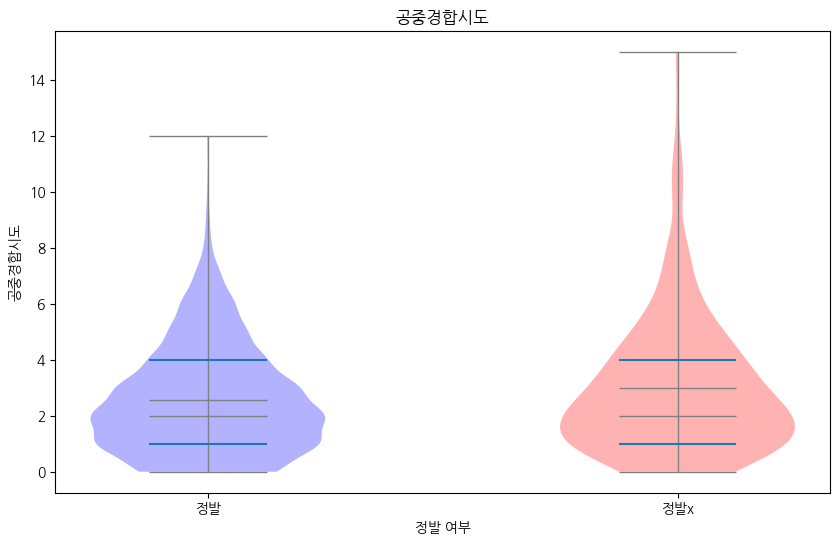

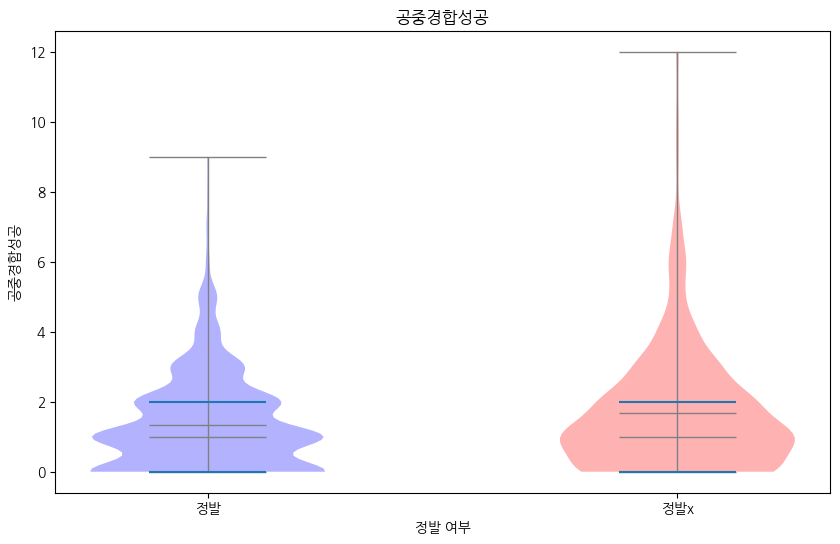

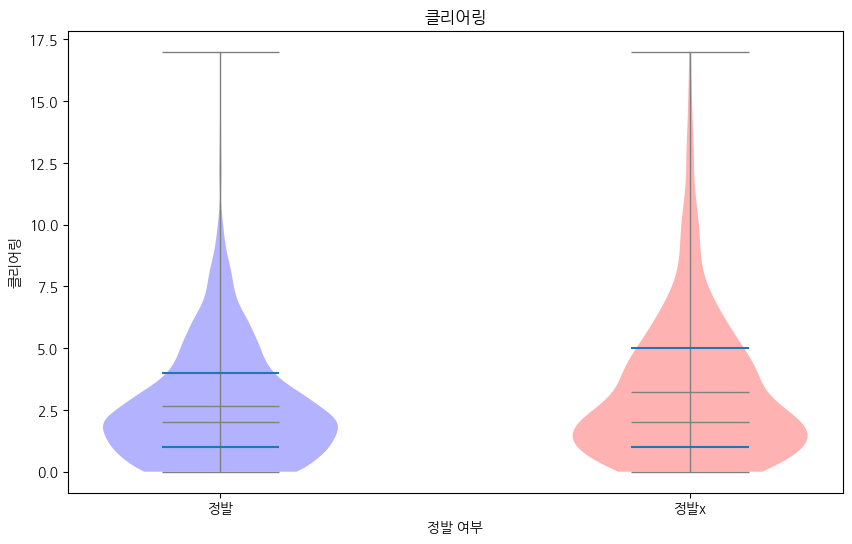

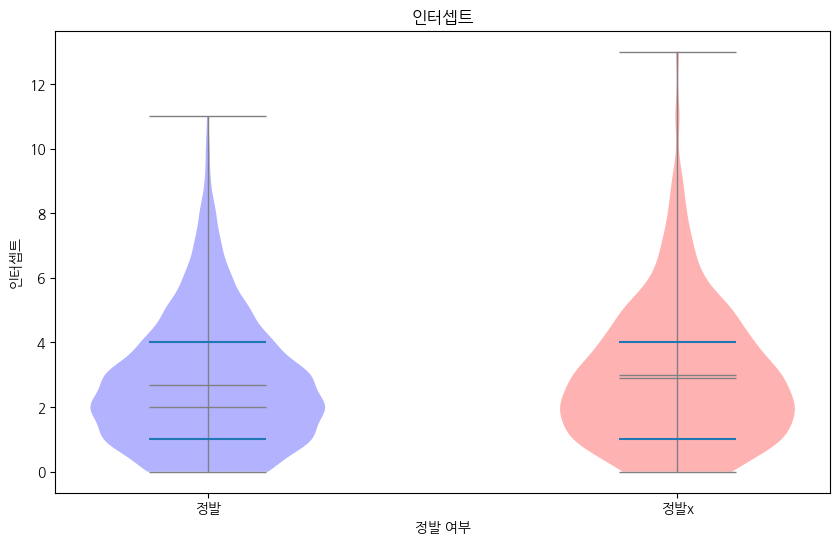

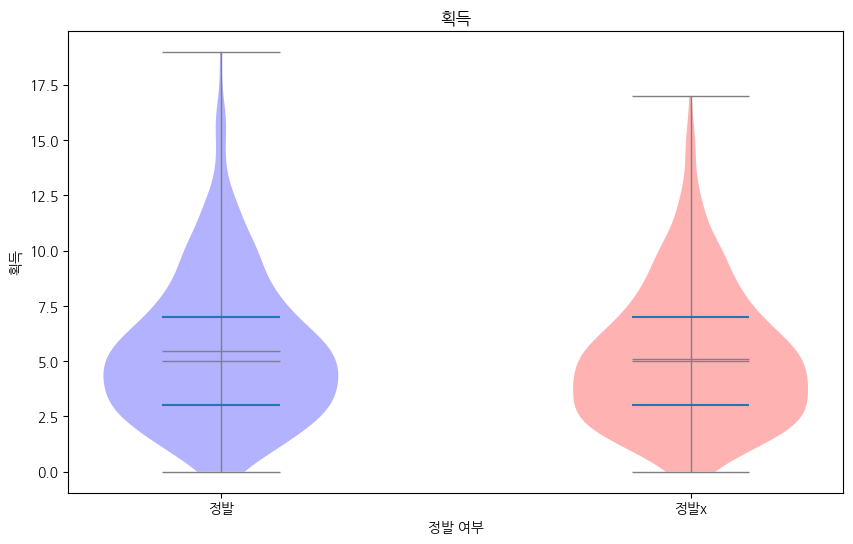

In [48]:
def violin_plots(df):
    for _, row in df.iterrows():
        metric = row['지표명']
        정발_data = row['정발 데이터']
        정발x_data = row['정발x 데이터']

        fig, ax = plt.subplots(figsize=(10, 6))

        violin = ax.violinplot(
            [정발_data, 정발x_data],
            showmeans=True,
            showextrema=True,
            showmedians=True,
            quantiles=[[0.25, 0.75], [0.25, 0.75]]
        )

        ax.set_xticks([1, 2])
        ax.set_xticklabels(['정발', '정발x'])
        ax.set_xlabel('정발 여부')
        ax.set_ylabel(metric)
        ax.set_title(f'{metric}')

        violin['bodies'][0].set_facecolor('blue')
        violin['bodies'][1].set_facecolor('red')

        for partname in ('cbars', 'cmins', 'cmaxes', 'cmeans', 'cmedians'):
            vp = violin[partname]
            vp.set_edgecolor('gray')
            vp.set_linewidth(1)

        plt.show()

side_com = violin_plots(side_vis)
side_com

In [ ]:
def plot_boxplots(results_df):
    for _, row in results_df.iterrows():
        metric = row['지표명']
        정발_data = row['정발 데이터']
        정발x_data = row['정발x 데이터']

        combined_data = pd.DataFrame({
            '정발여부': ['정발'] * len(정발_data) + ['정발x'] * len(정발x_data),
            metric: 정발_data + 정발x_data
        })

        plt.figure(figsize=(10, 6))
        sns.boxplot(x='정발여부', y=metric, data=combined_data)
        plt.title(f'{metric} - 정발 vs 정발x')
        plt.show()